In [58]:
import requests
import pandas as pd, matplotlib.pyplot as plt, statsmodels.api as sm
import numpy as np
import seaborn as sns
url_matchResults = "https://stats.espncricinfo.com/ci/engine/records/team/match_results.html?id=13840;type=tournament"


In [54]:
!pip install opendatasets

In [55]:
data = pd.read_html(url_matchResults, index_col=0) # many of the same kwargs as read_csv
match_result_df = data[0]
match_result_df.reset_index(level=0, inplace=True)
grounds = match_result_df['Ground'].unique()

numpy.ndarray

In [28]:
match_result_df

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard
0,Mumbai,RCB,RCB,2 wickets,Chennai,"Apr 9, 2021",T20
1,Super Kings,Capitals,Capitals,7 wickets,Mumbai,"Apr 10, 2021",T20
2,Sunrisers,KKR,KKR,10 runs,Chennai,"Apr 11, 2021",T20
3,Royals,Punjab Kings,Punjab Kings,4 runs,Mumbai,"Apr 12, 2021",T20
4,KKR,Mumbai,Mumbai,10 runs,Chennai,"Apr 13, 2021",T20
5,Sunrisers,RCB,RCB,6 runs,Chennai,"Apr 14, 2021",T20
6,Royals,Capitals,Royals,3 wickets,Mumbai,"Apr 15, 2021",T20
7,Punjab Kings,Super Kings,Super Kings,6 wickets,Mumbai,"Apr 16, 2021",T20
8,Mumbai,Sunrisers,Mumbai,13 runs,Chennai,"Apr 17, 2021",T20
9,RCB,KKR,RCB,38 runs,Chennai,"Apr 18, 2021",T20


In [56]:
import opendatasets as od
import os

def get_datasets():
    dataset = "https://www.kaggle.com/anuranroy/ipldatasets"
    od.download(dataset)
    data_dir = './ipldatasets'
    #os.listdir(data_dir)
    matches_df = pd.read_csv('ipldatasets/matches.csv')
    deliveries_df = pd.read_csv('ipldatasets/deliveries.csv')
    return matches_df, deliveries_df
matches_df, deliveries_df = get_datasets()

Skipping, found downloaded files in "./ipldatasets" (use force=True to force download)


In [57]:
matches_df # Data collect between 2008 - 2017 

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


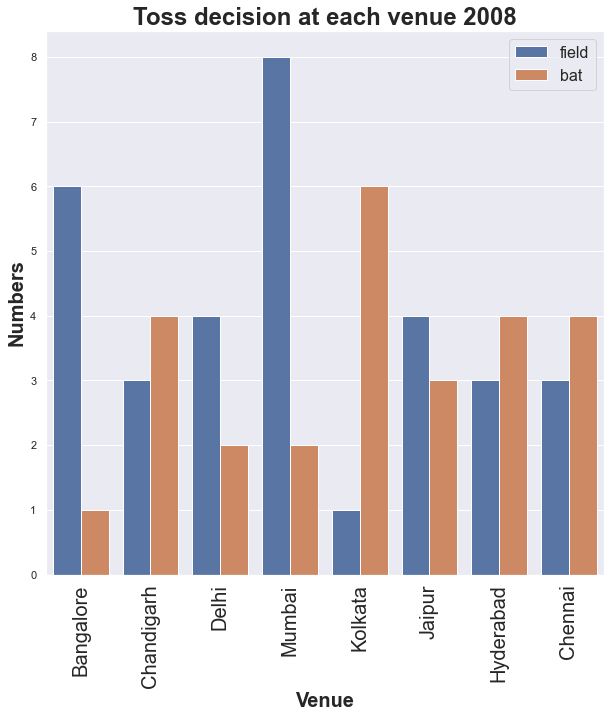

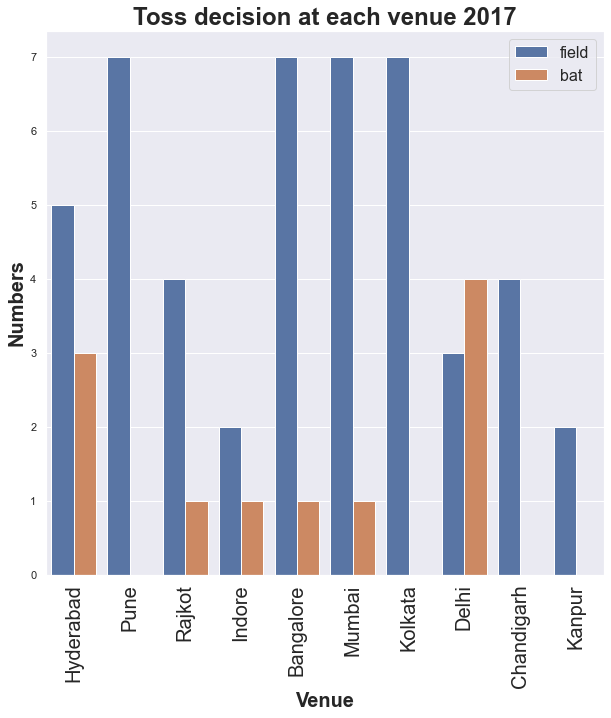

In [94]:
# Toss Decision 
'''
This function will create a plot which create a comprassion between venue and toss. 
We will only emphasis on the first 12 venue as they are present in India.
We observe this phonomonon to predict what should one choose if they win a toss at these venue
We can acheive result for each year by passing the year as the argument
'''
def venue_toss(year):
    sns.set(style='darkgrid')
    fig=plt.gcf()
    fig.set_size_inches(10,10)
    result_year = matches_df[matches_df['season'] == year]
    sns.countplot(x = result_year['city'], hue = result_year['toss_decision'])
    tit = 'Toss decision at each venue ' + str(year)
    plt.title(tit ,fontsize=24, fontweight='bold')
    plt.xticks(fontsize=20,rotation=90)
    plt.xlabel('Venue',fontsize=20, fontweight='bold')
    plt.ylabel('Numbers',fontsize=20, fontweight='bold')
    plt.legend(fontsize=16)
    plt.show()
venue_toss(2008)
venue_toss(2017)


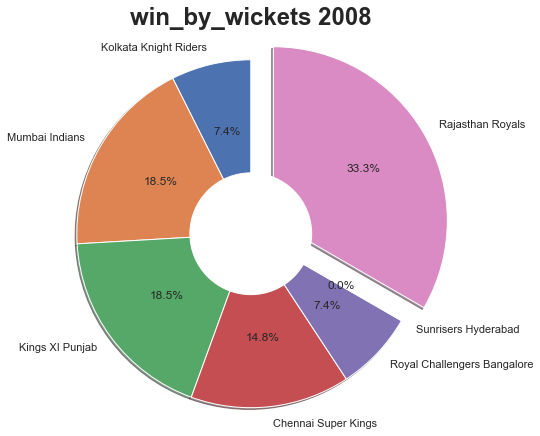

In [155]:
'''
We will sort our team performance by batting first and batting second
Win by runs => batting first 
win by wickets => batting second
'''

def wins_chart(year, wins_descb):
    result_year = matches_df[matches_df['season'] == year]
    data = result_year[(result_year[wins_descb]>0)] 
    summary_data = pd.DataFrame(data, columns = [wins_descb, 'winner'])
   
    teams_lst = ['Kolkata Knight Riders', 'Mumbai Indians', 'Kings XI Punjab', 'Chennai Super Kings','Royal Challengers Bangalore', 'Sunrisers Hyderabad','Rajasthan Royals'  ]
    wins_lst = []
    for i in teams_lst:
        wins_lst.append(summary_data[summary_data['winner']== i].count()['winner'])
   
    explode_lst = [0 for i in wins_lst]
    index = wins_lst.index(max(wins_lst)) #Where to explode our pie
    explode_lst[index] = 0.3
    explode = tuple(explode_lst)



    fig1, ax1 = plt.subplots()
    ax1.pie(wins_lst, explode = explode, labels =teams_lst, shadow=True, radius = 2,autopct='%1.1f%%',startangle=90)

    #draw circle
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    ax1.set_title(wins_descb + " "+ str(year),  pad=100, fontsize=24, fontweight='bold')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.show()

wins_chart(2008, 'win_by_wickets')


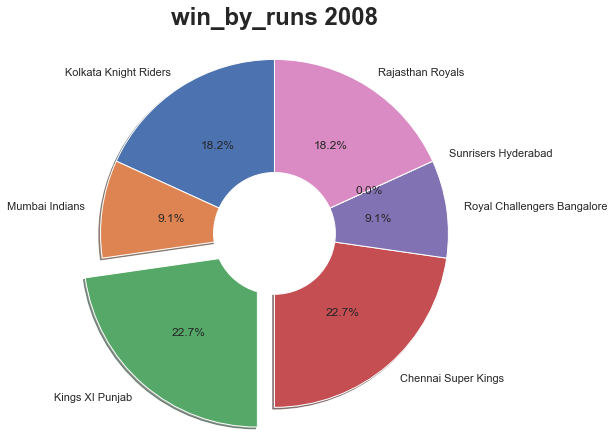

In [156]:
wins_chart(2008, 'win_by_runs')